In [267]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [268]:
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [270]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [271]:
# 1)Handling missing values
print(df.isnull().sum(), '\n'*2)
print(df.isnull().any())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64 


Avg. Area Income                False
Avg. Area House Age             False
Avg. Area Number of Rooms       False
Avg. Area Number of Bedrooms    False
Area Population                 False
Price                           False
Address                         False
dtype: bool


<AxesSubplot:ylabel='Avg. Area Income'>

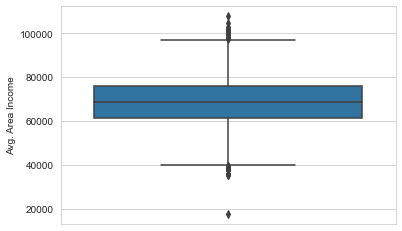

In [272]:
# 2)outlier treatment

sns.boxplot(y='Avg. Area Income', data=df)

<AxesSubplot:ylabel='Avg. Area House Age'>

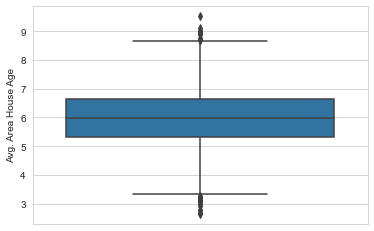

In [273]:
sns.boxplot(y='Avg. Area House Age', data=df)

<AxesSubplot:ylabel='Avg. Area Number of Rooms'>

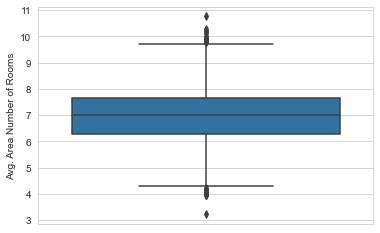

In [274]:
sns.boxplot(y='Avg. Area Number of Rooms', data=df)

<AxesSubplot:ylabel='Avg. Area Number of Bedrooms'>

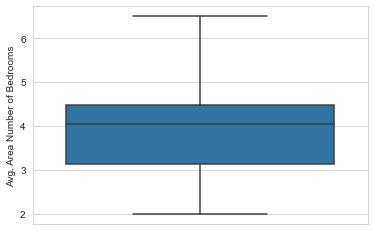

In [275]:
sns.boxplot(y='Avg. Area Number of Bedrooms', data=df)

<AxesSubplot:ylabel='Area Population'>

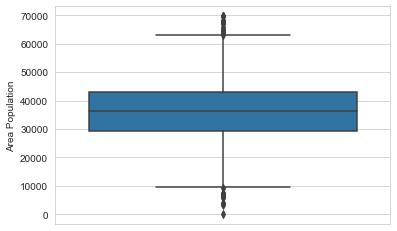

In [276]:
sns.boxplot(y='Area Population', data=df)

In [277]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
pos_outlier = q3 + 1.5 * IQR
neg_outlier = q1 - 1.5 * IQR

In [278]:
df=df[~((df<neg_outlier )|(df>pos_outlier)).any(axis=1)]

C:\Users\hp\AppData\Local\Temp\ipykernel_8448\3474882436.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<neg_outlier )|(df>pos_outlier)).any(axis=1)]


<AxesSubplot:ylabel='Avg. Area Number of Rooms'>

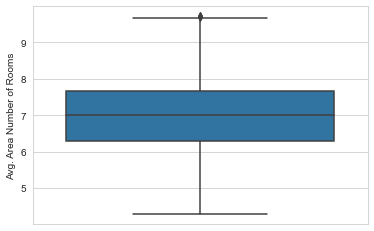

In [279]:
# cross check outlier for all IDV 
sns.boxplot(y='Avg. Area Number of Rooms', data=df)

In [280]:
# 3) Encoding concept

df['Address'].value_counts
# its not feasiable to take "address" variable so drop it

<bound method IndexOpsMixin.value_counts of 0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 4865, dtype: object>

In [281]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [282]:
df=df.loc[:, ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]

In [283]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [284]:
# pre-processing part 4 - feature scaling - will do later 
# first I'm doing EDA (Exploratory Data Analysis)

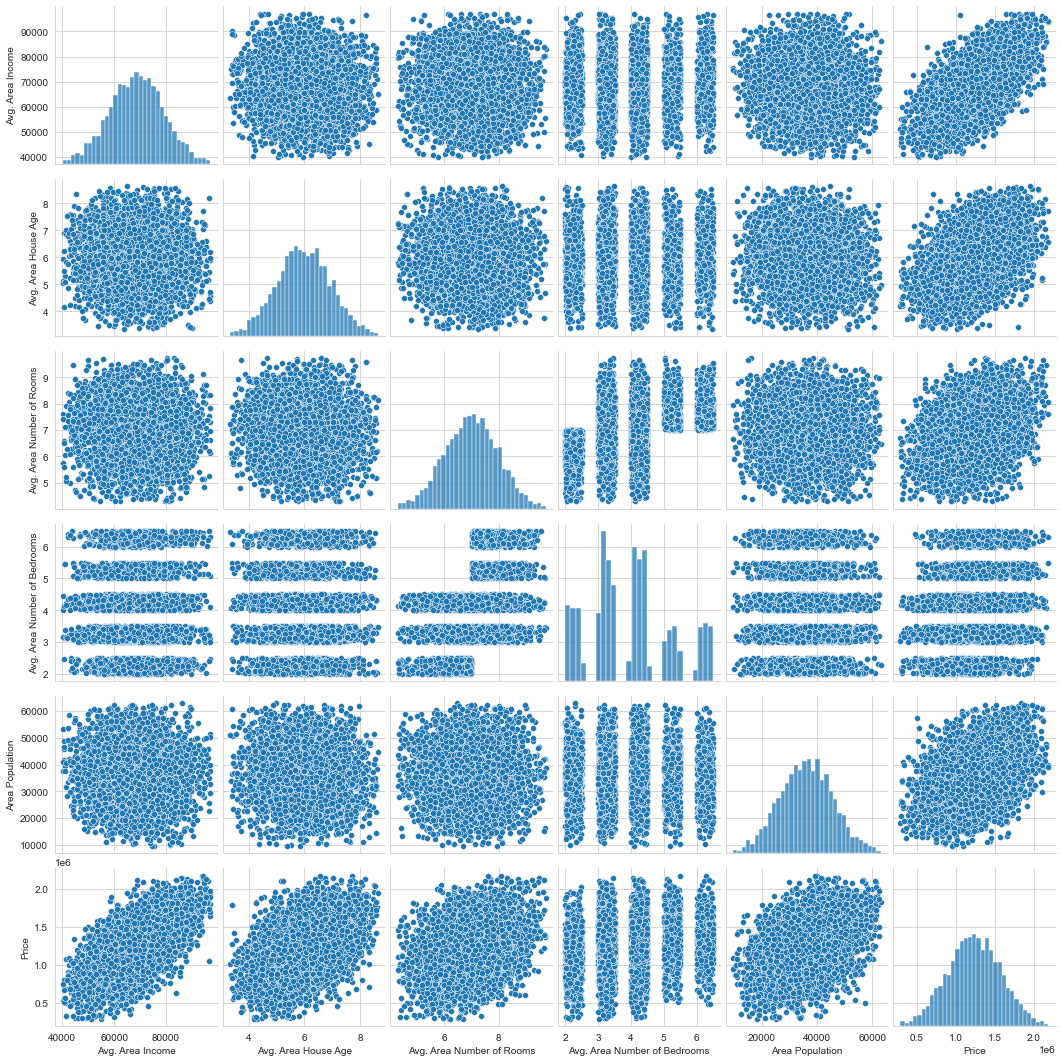

In [285]:
# Multivariates Analysis
sns.pairplot(df)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

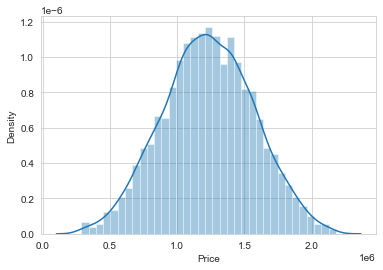

In [286]:
# Uni-variates
sns.distplot(df['Price'])

In [287]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097,0.632031
Avg. Area House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151,0.441675
Avg. Area Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244,0.329630
Avg. Area Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172,0.168606
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000,0.406027
Price,0.632031,0.441675,0.329630,0.168606,0.406027,1.000000


<AxesSubplot:>

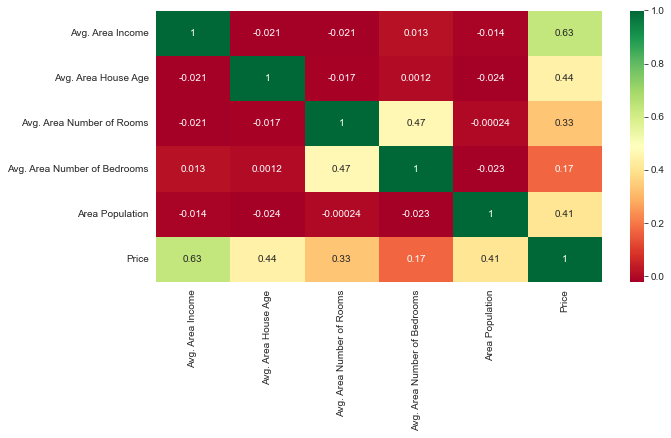

In [288]:
# Bi-Variate
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')

In [289]:
# splitting the data into independent variable and dependent variable

X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = df['Price']

In [290]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [291]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [292]:
# pre-processing part 4 - feature scaling (Independent variable)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_sc=scaler.fit_transform(X)

In [293]:
X_sc

array([[ 1.06071779, -0.30363229,  0.02290907,  0.0859644 , -1.35240284],
       [ 1.03191461,  0.02775903, -0.25978767, -0.72371729,  0.4207993 ],
       [-0.7110857 , -0.11411114,  1.5498338 ,  0.92803335,  0.07927052],
       ...,
       [-0.50694938,  1.31970959, -2.2154799 , -1.50101171, -0.29599705],
       [-0.05953013, -0.45737203,  0.14574608,  1.17903467,  0.67532313],
       [-0.30123371,  0.0167887 , -0.1973158 ,  0.06977076,  1.07753698]])

In [295]:
X_sc=pd.DataFrame(X_sc,columns=X.columns)
X_sc

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.060718,-0.303632,0.022909,0.085964,-1.352403
1,1.031915,0.027759,-0.259788,-0.723717,0.420799
2,-0.711086,-0.114111,1.549834,0.928033,0.079271
3,-0.511360,1.255143,-1.421675,-0.586071,-0.187641
4,-0.837711,-0.968724,0.866021,0.199320,-1.013324
...,...,...,...,...,...
4860,-0.780870,1.920048,-0.862483,-0.424135,-1.378290
4861,0.958419,1.059334,-0.416242,0.029287,-1.089912
4862,-0.506949,1.319710,-2.215480,-1.501012,-0.295997
4863,-0.059530,-0.457372,0.145746,1.179035,0.675323


# VIF (Variance Inflation Factor)¶

In [297]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = X_sc

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = X.columns

In [298]:
vif
# there is no multicollinearity in this dataset. we can cosider VIF only when the value is greater then 5 

,Variance Inflation Factor,Features
0,1.001776,Avg. Area Income
1,1.001451,Avg. Area House Age
2,1.280194,Avg. Area Number of Rooms
3,1.280126,Avg. Area Number of Bedrooms
4,1.001448,Area Population


In [299]:
# x is my independent variable - input
# y is my dependent variable - output

In [317]:
# Split the data into training and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.25, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3648, 5)
(1217, 5)
(3648,)
(1217,)


In [318]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1586,77187.848353,6.269795,6.774005,4.00,35106.546145
2669,61426.001335,4.143033,6.484096,3.32,45701.332850
2215,75869.654819,5.844481,5.793123,2.24,27606.007209
832,80951.283388,5.450699,6.323822,4.14,38990.807121
3538,53599.800859,6.553829,8.937600,3.41,28163.140587


In [319]:
X_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3409,79510.051991,6.403359,5.431044,3.08,32647.783285
583,70673.842544,6.204023,5.877785,3.06,58256.114762
3019,61536.557216,6.670543,6.994016,2.15,29346.720905
3808,78792.355268,5.735399,6.559515,4.01,29578.221202
1543,60805.103305,4.170949,7.347941,3.16,31185.883332


# Creating Linear Regression Model with training dataset

In [320]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [321]:
model.intercept_

-2620366.8560240045

In [322]:
model.coef_

array([2.14903770e+01, 1.65315951e+05, 1.19417255e+05, 2.66187472e+03,
       1.50894731e+01])

# Predict the model with test dataset

In [323]:
y_pred=model.predict(X_test)
y_pred

array([1296308.2776037 , 1513172.94235761, 1088579.8670683 , ...,
       1428360.89350331,  761380.84135452,  992514.68882431])

In [324]:
model.score(X_train, y_train)

0.9115214549952965

In [325]:
model.score(X_test, y_test)

0.9125707180361302

In [326]:
from sklearn import metrics

In [327]:
metrics.r2_score(y_test, y_pred)

0.9125707180361302

# Regression Model Evaluation by "OLS" Methods

In [331]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [332]:
reg_model = smf.OLS(endog = y_train, exog = X_train).fit()

In [316]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          2.140e+04
Date:                Thu, 15 Sep 2022   Prob (F-statistic):                        0.00
Time:                        16:45:53   Log-Likelihood:                         -50241.
No. Observations:                3648   AIC:                                  1.005e+05
Df Residuals:                    3643   BIC:                                  1.005e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.1917      0.308     33.060      0.000       9.587      10.796
Avg. Area House Age           5.183e+04   3373.132     15.367      0.000    4.52e+04    5.84e+04
Avg. Area Number of Rooms     -1.14e+04   3746.057     -3.043      0.002   -1.87e+04   -4055.448
Avg. Area Number of Bedrooms  7681.3886   3514.480      2.186      0.029     790.845    1.46e+04
Area Population                  8.0078      0.377     21.231      0.000       7.268       8.747
==============================================================================
Omnibus:                       10.233   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.400
Skew:                          -0.031   Prob(JB):                       0.0150
Kurtosis:                       2.774   Cond. No.                     9.47e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

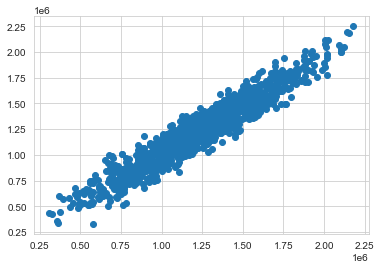

In [328]:
plt.scatter(y_test, y_pred)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


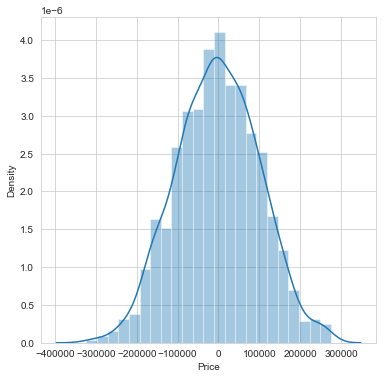

In [329]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-y_pred)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


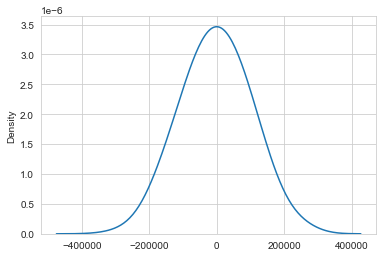

In [330]:
delta = y_test - y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta), bw=0.5)
plt.show()

In [333]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 81315.10131345454


In [337]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred)*100)

MAPE: 7.398214776315422


In [339]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 10223177913.740295


In [341]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 101109.73204266885
